# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
# Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [4]:
# Importando a base de dados

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Adicionando ao dataframe a coluna flag_doente.
# Se o valor for 1 a pessoa está doente, caso de 0 ela está saudável.

df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [6]:
# Bivariada com número de pessoas saudáveis: 0; doentes: 1; e total: all
# Na coluna sex, homem é 1 e mulher é 0.

tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [7]:
# Quantidade média de pessoas doentes
# Coluna de doentes dividido pelo total

tab['media_doentes'] = tab[1]/tab['All']
tab

flag_doente,0,1,All,media_doentes
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


In [8]:
# Chande de estar doente

tab['chance'] = tab[1]/tab[0]
tab

flag_doente,0,1,All,media_doentes,chance
sex,,,,,
0.0,72,25,97,0.257732,0.347222
1.0,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


In [9]:
# Razão de chance de estar doente tendo como base o total

tab['RC_doente'] = tab['chance']/tab.loc['All', 'chance']
tab

flag_doente,0,1,All,media_doentes,chance,RC_doente
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [10]:
# Logito

tab['Logito'] = np.log(tab['chance'])
tab

flag_doente,0,1,All,media_doentes,chance,RC_doente,Logito
sex,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410
All,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [11]:
# WOE

tab['WOE'] = np.log(tab['RC_doente'])
tab

flag_doente,0,1,All,media_doentes,chance,RC_doente,Logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [12]:
idade = pd.qcut(df['age'], 5)

In [13]:
# Usando o qcut dividi a faixa de idade em 5 conjuntos
# Depois usei o crosstab com a mesma variável utilizada anteriormente

tab_2 = pd.crosstab(idade, df['flag_doente'], margins=True)
tab_2

flag_doente,0,1,All
age,,,
"(28.999, 45.0]",47,16,63
"(45.0, 53.0]",42,22,64
"(53.0, 58.0]",32,39,71
"(58.0, 62.0]",13,32,45
"(62.0, 77.0]",30,30,60
All,164,139,303


In [16]:
# Os passos a seguir são os mesmos apresentados acima

# Media doentes

tab_2['media_doentes'] = tab_2[1]/tab_2['All']

# Chande de estar doente

tab_2['chance'] = tab_2[1]/tab_2[0]

# Razão de chance de estar doente tendo como base o total

tab_2['RC_doente'] = tab_2['chance']/tab_2.loc['All', 'chance']

# Logito

tab_2['Logito'] = np.log(tab_2['chance'])

# WOE

tab_2['WOE'] = np.log(tab_2['RC_doente'])

tab_2

flag_doente,0,1,All,media_doentes,chance,RC_doente,Logito,WOE
age,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<Axes: xlabel='age'>

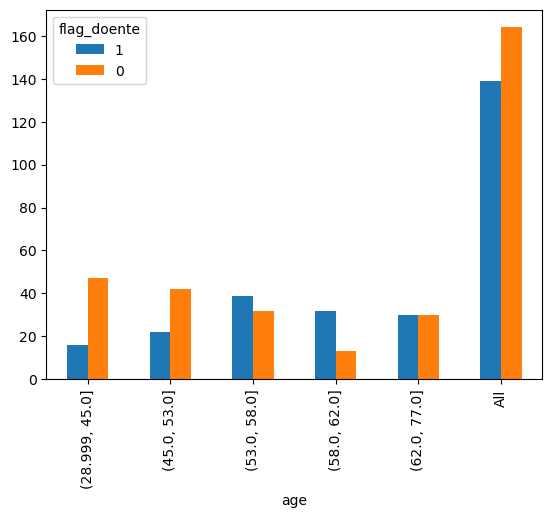

In [17]:
tab_2[[1,0]].plot.bar()

### Insights:

Nas duas primeiras faixas de idade a quantidade de pessoas saudáveis é maior do que de pessoas doentes.

Nas duas faixas seguintes a quantidade de pessoas doentes é maior do que de pessoas saudáveis.

Na última faixa a quantidade de pessoas doentes e saudáveis é muito semelhante.

Considerando total de pessoas doentes e saudáveis, observa-se que a quantidade de pessoas saudáveis é maior do que de pessoas doentes, contudo a proporção é de quase 50%.

<Axes: xlabel='age'>

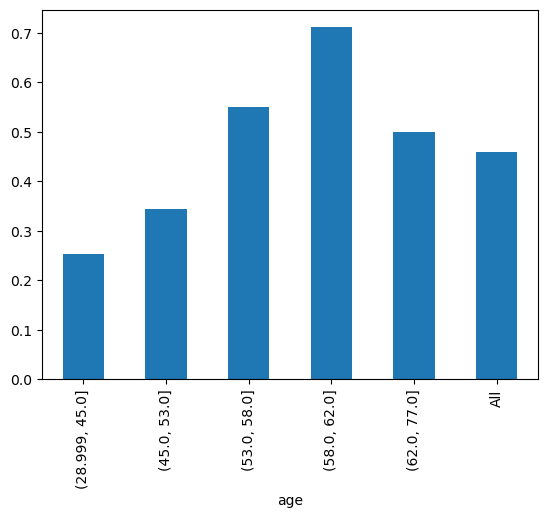

In [91]:
tab_2['media_doentes'].plot.bar()

### Insights:

Este gráfico afirma o que foi observado no gráfico anterior.

<Axes: xlabel='age'>

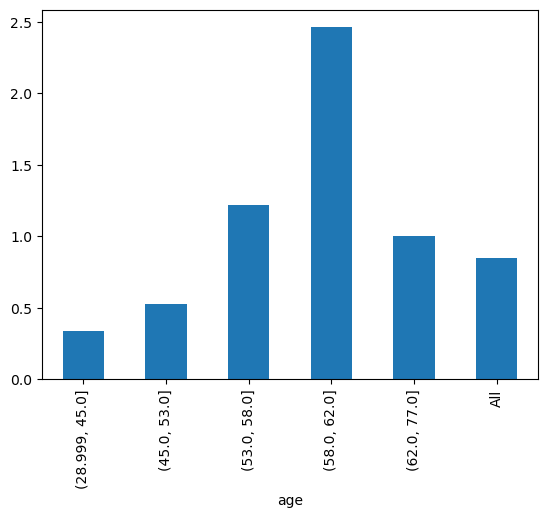

In [92]:
tab_2['chance'].plot.bar()

### Insights:

A chance de encontrar uma pessoa doente na faixa de 58 - 62 é de 2.5 vezes.

Caso fosse realizado algum tipo de estudo mais aprofundado sobre a doença, esta faixa de idade seria a mais indicada.

Outra coisa importante que se deve tirar dessa informação é que pessoas nessa faixa de idade devem cuidar melhor da saúde já que são mais sucetíveis à doenças cardíacas, tomando cuidado com a alimentação e praticando exercícios de baixa intensidade com maior frequencia. Além disso, realizar exames com maior periodicidade para que a doença seja identificada nos estágios iniciais, aumentando a efetividade dos tramentos exigidos.

<Axes: xlabel='age'>

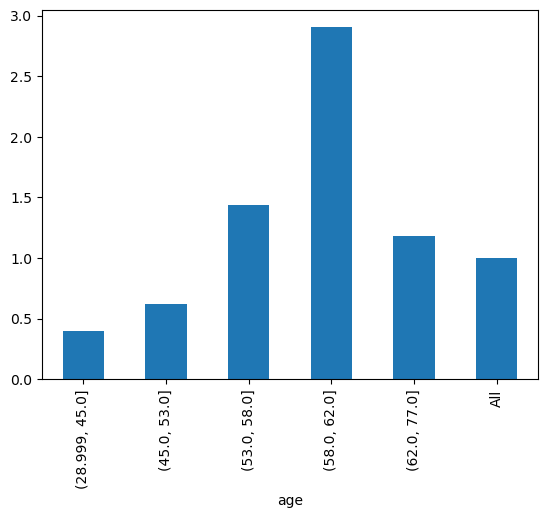

In [77]:
tab_2['RC_doente'].plot.bar()

### Insights:

Este gráfico reforça as ideias apresentadas anteriormente.

<Axes: xlabel='age'>

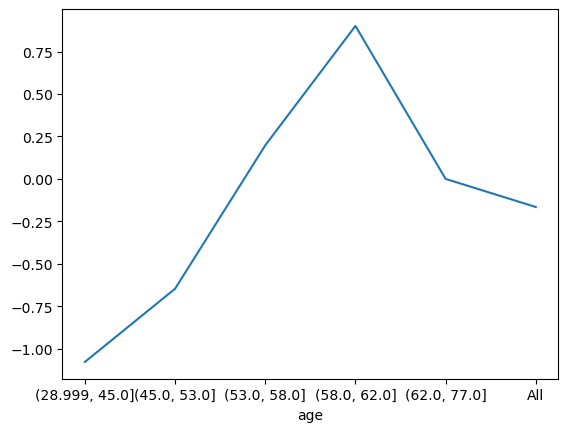

In [93]:
tab_2['Logito'].plot.line()

<Axes: xlabel='age'>

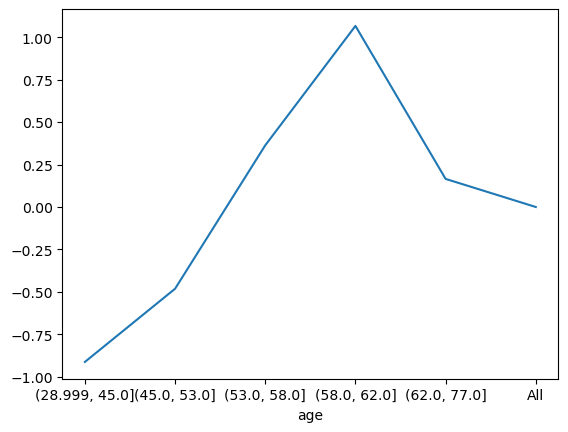

In [94]:
tab_2['WOE'].plot.line()

### Insights:

Uma possível interpretação dos últimos dois gráficos, que estão em escala logaritmica, é de que quanto mais próximo o valor obtido estiver de 1 maior a chance de estar doente e quanto mais próximo de -1 menor a chance.